# New Section

F1 Score: 0.9470


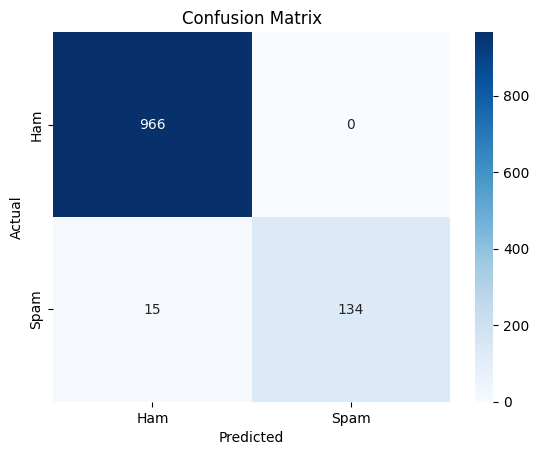

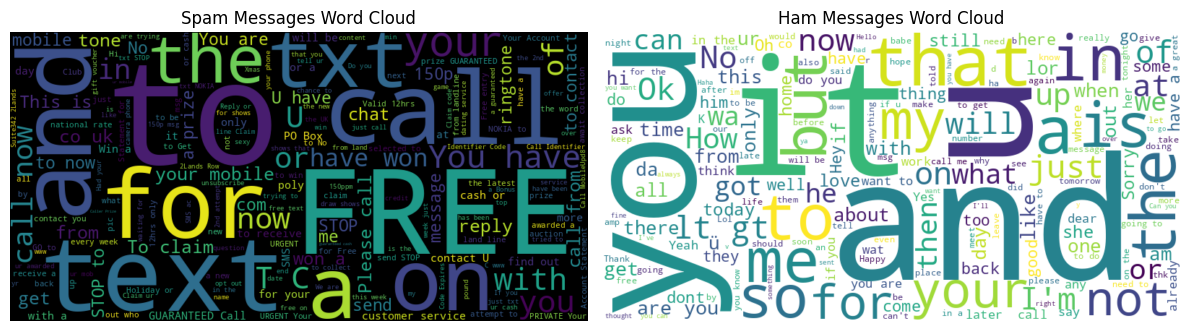

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the dataset
df = pd.read_csv('/SMSSpamCollection', sep='\t', header=None, names=["label", "message"])

# Preprocess the text data: Convert labels to binary (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data into features and labels
X = df['message']
y = df['label']

# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_vectorized = vectorizer.fit_transform(X)

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix to evaluate performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Word frequency distribution for spam and ham messages
spam_messages = df[df['label'] == 1]['message']
ham_messages = df[df['label'] == 0]['message']

# Combine all spam and ham messages into a single string
spam_text = ' '.join(spam_messages)
ham_text = ' '.join(ham_messages)

# Generate word clouds for both spam and ham messages
spam_wordcloud = WordCloud(stopwords='english', background_color='black', width=800, height=400).generate(spam_text)
ham_wordcloud = WordCloud(stopwords='english', background_color='white', width=800, height=400).generate(ham_text)

# Plotting the word clouds
plt.figure(figsize=(12, 6))

# Spam wordcloud
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

# Ham wordcloud
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()


# New Section